In [71]:
from sherpa.astro.ui import *
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd

In [123]:
observed=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/observed_full_info.csv')
interest=observed.loc[observed['# ObsID']=='3038'].head(1) #the one guy i downloaded

read ARF file /Users/kciurleo/Downloads/0782940101PPS/pps/P0782940101PNS003SRCARF0001.FTZ
read RMF file /Users/kciurleo/Downloads/0782940101PPS/pps/epn_e3_ff20_sdY9.rmf
read background file /Users/kciurleo/Downloads/0782940101PPS/pps/P0782940101PNS003BGSPEC0001.FTZ
dataset 1: 0:20.48 Energy (keV) -> no data
dataset 1: no data -> 0.324919:11.07 Energy (keV)
Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 4.37872e+10
Final fit statistic   = 102.867 at function evaluation 29
Data points           = 143
Degrees of freedom    = 140
Probability [Q-value] = 0.992065
Reduced statistic     = 0.734762
Change in statistic   = 4.37872e+10
   abs2.nH        0.0569205    +/- 0.00853377  
   p1.PhoIndex    1.46639      +/- 0.0212172   
   p1.norm        0.000638098  +/- 1.69095e-05 


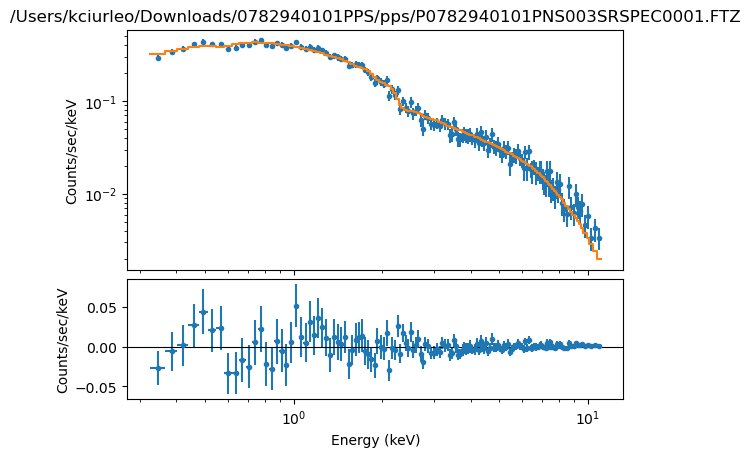

In [131]:
base='/Users/kciurleo/Downloads/0782940101PPS/pps/'
file='P0782940101PNS003SRSPEC0001.FTZ'

mdl = f'(xsphabs.abs1*xszphabs.abs2 * xszpowerlw.p1)'

nH=interest['galactic nH']
z=interest['Z']

clean()
load_pha(f'{base}{file}')
ignore()
notice(0.35,10)
#actual fitting
set_model(1,mdl)

abs1.nH = nH
freeze(abs1.nH)
p1.redshift = z
abs2.redshift = z
fit()
plot_fit_resid(xlog=True,ylog=True)



In [90]:
print(interest[['nH', 'nH error plus','gamma', 'gamma error minus']])

        nH  nH error plus     gamma  gamma error minus
6  0.00006       0.020492  1.716739           0.132433


In [24]:
os.chdir(base)
files = os.listdir()
print(len(files))
interesting_files=[]
for f in files:
    if "P0782940101PNS003" in f and 'FTZ' in f:
        interesting_files.append(f)
        print(f)
print(len(interesting_files))



863
P0782940101PNS003EXPMAP2000.FTZ
P0782940101PNS003IMAGE_3000.FTZ
P0782940101PNS003IMAGE_1000.FTZ
P0782940101PNS003SRCTSR802E.FTZ
P0782940101PNS003SRCTSR803C.FTZ
P0782940101PNS003SRCTSR8009.FTZ
P0782940101PNS003PIEVLI0000.FTZ
P0782940101PNS003SRCTSR8008.FTZ
P0782940101PNS003SRSPEC002E.FTZ
P0782940101PNS003IMAGE_5000.FTZ
P0782940101PNS003BGSPEC000D.FTZ
P0782940101PNS003BGSPEC0002.FTZ
P0782940101PNS003BGSPEC0016.FTZ
P0782940101PNS003BGSPEC0017.FTZ
P0782940101PNS003BGSPEC0003.FTZ
P0782940101PNS003BGSPEC000E.FTZ
P0782940101PNS003EXPMAP8000.FTZ
P0782940101PNS003SRSPEC0008.FTZ
P0782940101PNS003BGSPEC001C.FTZ
P0782940101PNS003BGSPEC0015.FTZ
P0782940101PNS003BGSPEC0001.FTZ
P0782940101PNS003EXPMAP4000.FTZ
P0782940101PNS003BGSPEC0014.FTZ
P0782940101PNS003BGSPEC000F.FTZ
P0782940101PNS003BGSPEC0028.FTZ
P0782940101PNS003SRSPEC0009.FTZ
P0782940101PNS003SRSPEC003C.FTZ
P0782940101PNS003SRCARF003C.FTZ
P0782940101PNS003SRCARF0009.FTZ
P0782940101PNS003BGSPEC0010.FTZ
P0782940101PNS003BGSPEC0004.FTZ
P078

In [132]:
sas_vers = fits.getheader(f'{base}P0782940101PNS003SRSPEC0001.FTZ',ext=0)['SASVERS']
sas_vers
hdr =fits.getheader(f'{base}P0782940101PNS003SRSPEC0001.FTZ',ext=1)
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   10 / width of table in bytes                        
NAXIS2  =                 4096 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / The name of this column                        
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'COUNTS  '           / The name of this column                        
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TUNIT2  = 'count   '        

In [109]:
testdict={
    '5.2.0': '2001-12-19_sas5.2.0/',
    '5.4.0': '2003-01-28_sas_5.4.0/',
    '6.0.0': '2004-07-30_sas6.0.0/',
    '6.1.0': '2004-12-03_sas6.1.0/',
    '6.5.0': '2005-12-14_sas6.5.0/',
    '7.1.0': '2007-07-17_sas7.1.0/',
    '8.0.0': '2008-07-23_sas8.0.0/',
    '9.0.0': '2009-06-15_sas9.0.0/',
    '10.0.0': '2010-04-23_sas10.0.0/',
    '11.0.0': '2011-02-23_sas11.0.0/',
    '12.0.1': '2012-06-25_sas12.0.1/',
    '13.0.0': '2013-05-01_sas13.0.0/',
    '13.5.0': '2013-12-09_sas13.5.0/',
    '14.0.0': '2014-11-13_sas14.0.0/',
    '15.0.0': '2016-02-01_sas15.0.0/',
    '16.0.0': '2017-01-12_sas16.0.0/',
    '17.0.0': '2018-06-22_sas17.0.0/',
    '18.0.0': '2019-07-31_sas18.0.0/',
    '19.0.0': '2020-10-28_sas19.0.0/',
    '20.0.0': '2021-12-09_sas20.0.0/'
}

In [122]:
newbase='/opt/pwdata/katie/xmm/'
fits.getheader(f'{newbase}0101640201/pps/P0101640201M1S002SRSPEC0005.FTZ',ext=1)['SRC_DEC']

0.502974967737503

In [ ]:
#THIS IS SETH's CODE    
srcmodel = 'xszpowerlw.p1'
    absmodel = 'xsphabs.abs1*xszphabs.abs2'
    mdl = f'({absmodel} * {srcmodel})'
    set_model(1,mdl)

    abs1.nH = nH
    freeze(abs1.nH)
    p1.redshift = z
    abs2.redshift = z


    #Use the fitter to stage the background so it can be fit by sherpa
    fitter = SingleFitter(1,f'{dir}/reextract_pha_bkg.pi',ChandraBackground)

    #cannot use the built in fitter staging method since that fucks up the energy units on the plots
    for stage in fitter.bm.stages:
        fitter.prepare_stage(stage=stage)

    #ignore low and high energy
    ignore()
    notice(0.3,7.5)
    ignore(bkg_id=1)
    notice(0.3,7.5,bkg_id=1)

    #perform the bkg fit
    fit_bkg()

    #freeze the background model parameters
    for p in get_bkg_model(1).pars:
        p.freeze()

    #set the full model
    set_full_model(1, get_bkg_model(1)*get_bkg_scale(1)+get_response(1)(mdl))

    #sherpa fit
    fit()



    #make a plot
    plot_fit_resid(xlog=True,ylog=True)
    plt.title(None)
    plt.savefig(f'{dir}/sherpa_data_fit.pdf')
    plt.close()

In [103]:
df[['srcid', 'detid', 'observation_id', 'observation_oid']].astype(int)

,srcid,detid,observation_id,observation_oid
0,202021902010010,102021902010010,202190201,57587
1,202044101010008,102044101010008,204410101,57826
2,201016402010014,101016402010014,101640201,54912
3,201016402010014,101016402010014,101640201,54912
4,208434401010012,108434401010012,843440101,70607
...,...,...,...,...
151,207829401010012,107829401010012,782940101,67487
152,200930302010011,100930302010011,93030201,54723
153,200423413010006,108273504010010,827350401,71125
154,200423413010006,100423413010006,42341301,54301


101